# Redes neurais lineares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_networks as neural_network
import common as com

from sklearn import datasets

np.random.seed(12345)

x, y = datasets.load_iris(return_X_y=True)
x, y = x[y < 2,:2], y[y < 2]
#y[y == 0] = -1
labels = [0, 1]
labels_text = ['Iris-Setosa','Iris-Versicolor']
colors = ['green', 'blue']

def plot_data(x, y, marker='o', legend=True, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        label=labels_text[i], s=10*com.markersize, marker=marker, color=colors[i])    
    if only_data is False:
        if legend:
            plt.legend()
        plt.xlabel('Tamanho da sépala (cm)', )
        plt.ylabel('Largura da sépala (cm)')
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 
#plt.savefig('iris_binaria.png', dpi=com.dpi)

In [2]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 71
Número de padrões de teste: 29


## Solução via Perceptron Simples

/home/cesarlincoln/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


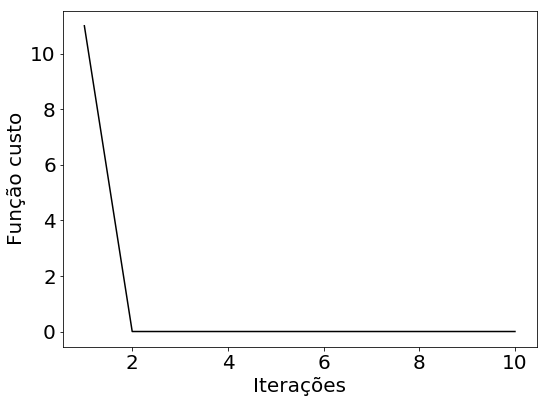

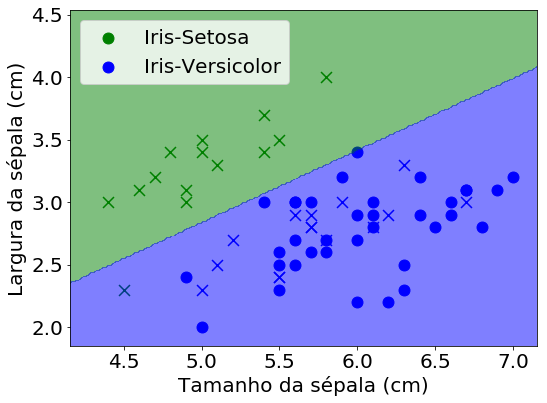

In [3]:
model_perceptron = neural_network.train_perceptron(x=x_train, y=y_train, alpha=1, num_epochs=10)  
loss_history_perceptron = model_perceptron['loss_history']
loss_perceptron = loss_history_perceptron[-1]

if len(loss_history_perceptron) > 1:
    com.plot_loss_path(loss_history_perceptron)

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model_perceptron,
                  lambda x, model: neural_network.linear_class_predic(model_perceptron, x),
                  xx, yy, colors)
#plt.savefig('iris_binaria_bound2.png', dpi=com.dpi)

## Solução via ADALINE

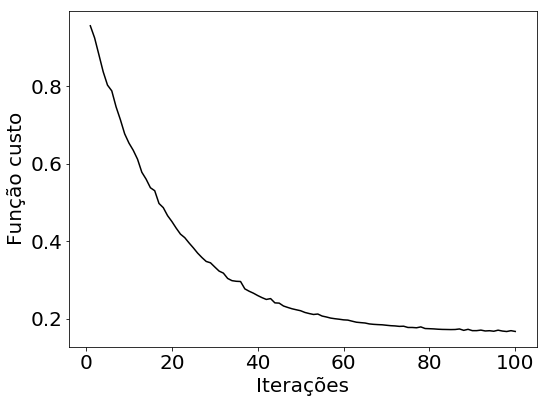

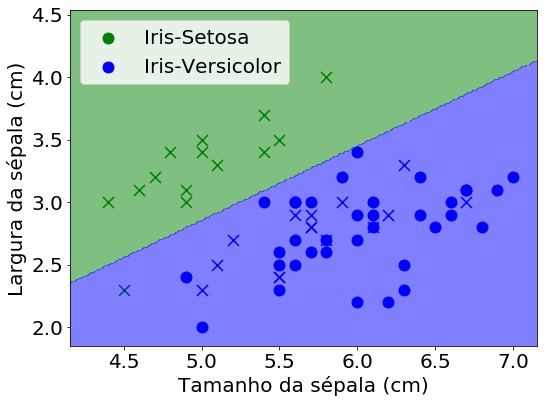

In [4]:
model_adaline = neural_network.train_adaline(x=x_train, y=y_train, alpha=0.001, num_epochs=100)  
loss_history_adaline = model_adaline['loss_history']
loss_adaline = loss_history_adaline[-1]

if len(loss_history_adaline) > 1:
    com.plot_loss_path(loss_history_adaline)

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model_adaline,
                  lambda x, model: neural_network.linear_class_predic(model_adaline, x),
                  xx, yy, colors)
#plt.savefig('iris_binaria_bound2.png', dpi=com.dpi)